In [1]:
# Initial imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Data loading
file_path = Path("Resources/myopia.csv")
df = pd.read_csv(file_path)
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [3]:
X = df.drop('MYOPIC',axis=1)
labels=df['MYOPIC']
X

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [4]:
# Find null values
for column in X.columns:
    print(f"Column {column} has {X[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [5]:
# Find duplicate entries
print(f"Duplicate entries: {X.duplicated().sum()}")

Duplicate entries: 0


In [10]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)


In [12]:
# Initialize PCA model
pca = PCA(n_components=0.90)
pca_data = pca.fit_transform(scaled_data)
pca_data.shape

(618, 10)

In [13]:
# Transform PCA data to a DataFrame
df_pca = pd.DataFrame(
    data=pca_data, columns=["pc1", "pc2", "pc3", "pc4", "pc5", "pc6", "pc7", "pc8", "pc9", "pc10"]
)
df_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [16]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)
# Reduce dimensions
tsne_features = tsne.fit_transform(df_pca)

C:\Users\13135\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [17]:
tsne_features.shape


(618, 2)

In [18]:
# Prepare to plot the dataset
X['x'] = tsne_features[:,0]
X['y'] = tsne_features[:,1]

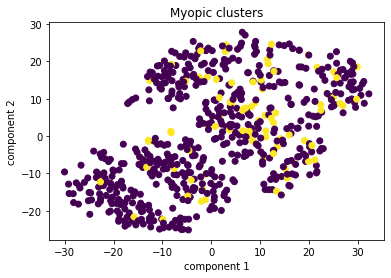

In [19]:
# Visualize the clusters
plt.scatter(X['x'], X['y'],c=labels)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Myopic clusters')
plt.show()

C:\Users\13135\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


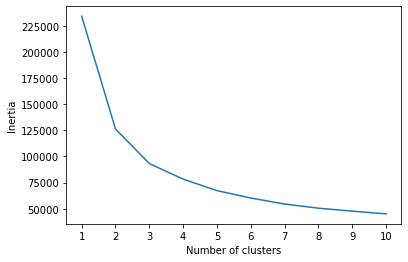

In [20]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [21]:
# Initializing model with K = 3 
model = KMeans(n_clusters=3, random_state=0)
# Fitting model
model.fit(df_pca)

KMeans(n_clusters=3, random_state=0)

In [22]:
# Get predictions
predictions = model.predict(df_pca)
print(predictions)

[0 1 0 0 1 0 0 0 1 0 2 1 0 1 1 1 1 1 2 0 0 0 0 2 1 0 1 1 1 1 0 2 1 0 1 1 2
 1 0 1 0 1 2 1 0 1 2 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 2 1 0 1 1 0 2 1 2 2
 1 1 1 2 0 0 0 0 0 1 0 1 2 2 1 1 1 0 1 1 0 2 0 1 1 1 2 0 2 0 2 2 0 0 0 0 2
 0 1 1 0 0 1 0 1 0 0 0 1 1 2 2 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1
 1 2 0 0 2 1 0 0 0 1 1 1 0 0 1 1 1 1 2 0 1 0 1 0 2 0 0 1 1 0 0 1 1 2 0 1 1
 2 0 0 1 1 1 1 1 1 0 2 0 1 0 0 0 0 1 0 1 0 0 1 0 1 2 1 1 0 0 1 2 0 1 0 1 0
 2 0 0 2 2 1 0 1 2 1 0 2 1 1 0 0 1 1 2 0 0 0 0 0 1 0 2 0 1 2 0 2 1 0 0 0 1
 0 1 0 0 1 0 1 0 1 0 0 1 1 1 2 1 0 0 0 2 0 1 2 1 2 1 1 1 2 0 1 0 0 1 0 2 0
 0 0 2 0 0 1 0 2 1 1 2 0 0 2 0 0 0 1 0 0 0 1 0 2 1 0 1 2 0 0 0 0 1 1 0 1 0
 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 2 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0
 1 1 1 0 2 1 1 0 0 1 2 0 1 1 1 2 0 2 1 2 0 2 1 0 1 0 1 0 1 1 1 0 1 2 2 0 1
 2 1 1 1 1 0 1 0 0 0 1 1 0 2 2 0 0 2 1 1 2 0 1 2 1 0 0 0 0 0 2 0 2 0 0 0 2
 1 0 1 0 0 1 2 2 1 2 0 1 1 0 1 1 0 1 0 0 2 1 0 2 0 2 0 2 1 0 2 1 0 1 0 1 0
 0 1 2 1 1 0 2 1 2 2 0 0 

In [24]:
# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_pca)

# Predict clusters
predictions = model.predict(df_pca)

# Add the predicted class column to the dataframe
df_pca["class"] = model.labels_
df_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,0
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,1


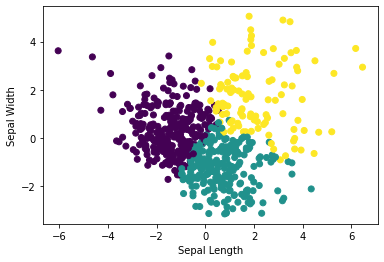

In [28]:
plt.scatter(x=df_pca["pc1"], y=df_pca['pc2'], c=df_pca['class'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()